In [1]:
!pip install opencv-python
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle 
from tensorflow import keras
from tensorflow.keras import layers
os.getcwd()

'C:\\Users\\LENOVO'

In [2]:
import os
os.getcwd()

folder = 'dd_dataset'
classes= ['Open_eyes', 'Closed_eyes']
train_data = []

for i in classes:
    path= os.path.join(folder,i)
    class_num = classes.index(i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        new_array = cv2.resize(rgb,(224,224))
        train_data.append([new_array,class_num])
      

In [3]:
import random
random.shuffle(train_data)


In [4]:
import numpy as np
x=[]
y=[]
 
for i,j in train_data:
    x.append(i)
    y.append(j)
    
x = np.array(x).reshape(-1,224,224,3)    
x.shape

(4000, 224, 224, 3)

In [5]:
x = x/255.0
#print(x)
y = np.array(y)

In [6]:
import pickle
pickle_out= open('x.pickle','wb')
pickle.dump(x , pickle_out)
pickle_out.close
pickle_out= open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close

pickle_in = open('x.pickle','rb')
x = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

In [7]:
import tensorflow as tf
model= tf.keras.applications.mobilenet.MobileNet()
from tensorflow.keras import layers
#model.summary()

In [8]:
base_input = model.layers[0].input
base_output = model.layers[-4].output
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_op = layers.Activation('sigmoid')(final_output)
new_model = keras.Model(inputs = base_input , outputs = final_output )
new_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
new_model.fit(x,y,epochs=8, validation_split = 0.1)

Epoch 1/8
113/113 [==============================] - 927s 8s/step - loss: 0.6781 - accuracy: 0.9514 - val_loss: 0.5739 - val_accuracy: 0.9625
Epoch 2/8
113/113 [==============================] - 939s 8s/step - loss: 0.0303 - accuracy: 0.9978 - val_loss: 0.1144 - val_accuracy: 0.9925
Epoch 3/8
113/113 [==============================] - 957s 8s/step - loss: 0.0298 - accuracy: 0.9981 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/8
113/113 [==============================] - 874s 8s/step - loss: 0.0128 - accuracy: 0.9992 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/8
113/113 [==============================] - 897s 8s/step - loss: 0.0128 - accuracy: 0.9992 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/8
113/113 [==============================] - 990s 9s/step - loss: 2.2903 - accuracy: 0.8433 - val_loss: 3.6625 - val_accuracy: 0.7625
Epoch 7/8
113/113 [==============================] - 874s 8s/step - loss: 0.2693 - accuracy: 0.9800 - val_loss: 0.4266 - val_accuracy: 0

In [9]:
new_model.save('my_model.h5')

In [10]:
new_model = tf.keras.models.load_model('my_model.h5')

In [16]:
img = cv2.imread('open-test_1.png', cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb , (224,224))

In [17]:
x_input = np.array(new).reshape(1,224,224,3)
x_input.shape

(1, 224, 224, 3)

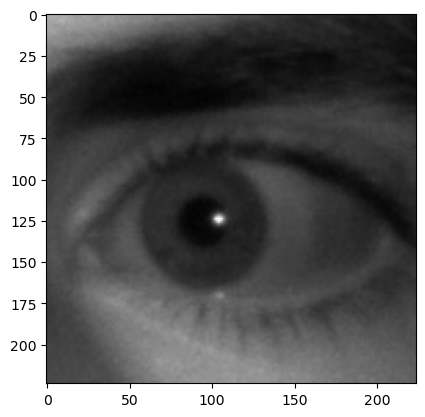

In [18]:
x_input = x_input/255.0
plt.imshow(new)

In [19]:
prediction = new_model.predict(x_input)

1/1 [==============================] - 3s 3s/step


In [20]:
prediction

array([[-33.998085]], dtype=float32)

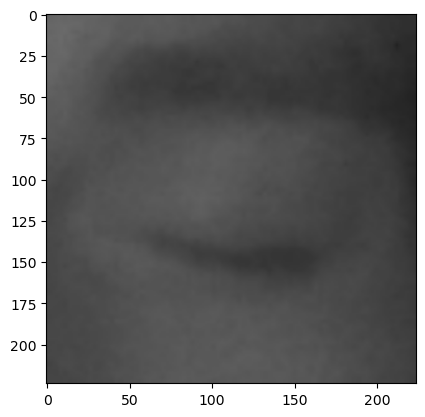

In [22]:
img_2 = cv2.imread('closed_test_1.png',cv2.IMREAD_GRAYSCALE)
rgb_2 = cv2.cvtColor(img_2, cv2.COLOR_GRAY2RGB)
new_2 = cv2.resize(rgb_2, (224,224))
x_input = np.array(new_2).reshape(1,224,224,3)
x_input = x_input/255.0
plt.imshow(new_2)

In [23]:
prediction = new_model.predict(x_input)
prediction 

1/1 [==============================] - 0s 163ms/step


array([[14.121431]], dtype=float32)

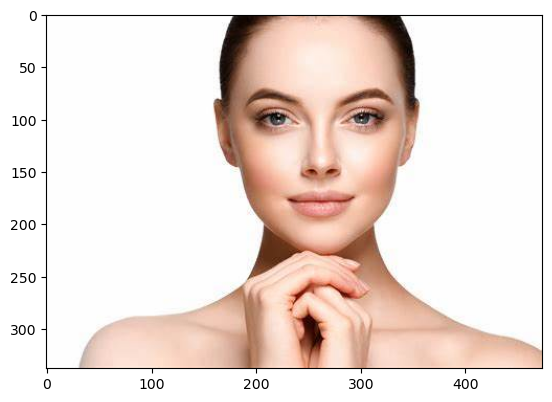

In [27]:
img = cv2.imread('full_face.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

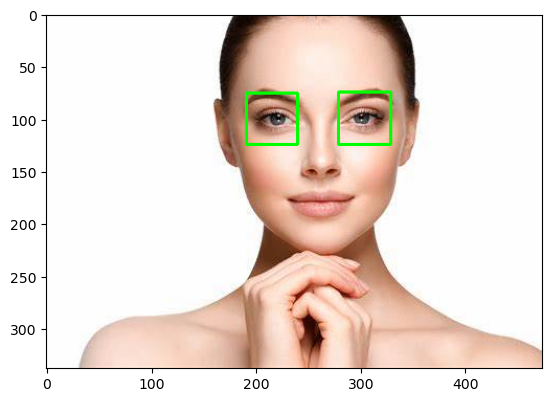

In [32]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes[:2]:
    cv2.rectangle(img,(x,y),(x+w,y+h), (0,255,0),2)
    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))           
        

NameError: name 'eye_cascade' is not defined

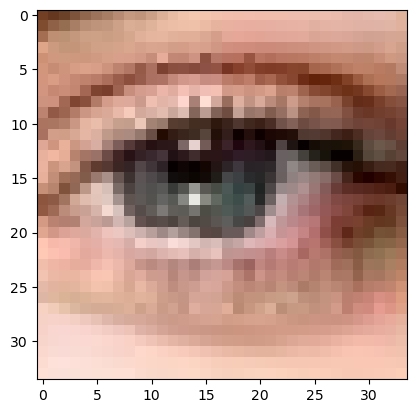

In [35]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)   
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes[:2]:
    roi_gray = gray[y:y+h , x:x+w]
    roi_color = img[y:y+h , x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) ==0:
        print('eyes are not detected')
    else :
        for(ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey : ey+eh, ex: ex+ew]
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))                     

In [36]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image , axis =0)
final_image = final_image/255.0
final_image.shape
predictions = new_model.predict(final_image)
predictions

1/1 [==============================] - 0s 232ms/step


array([[-9.841931]], dtype=float32)

In [2]:
import cv2
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError('cannot open webcam')


In [ ]:
while True:
    cbs = 0
        # read the camera frame
    success, frame = cap.read()
    if not success:
        break
    else:
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
        faces = face_cascade.detectMultiScale(frame, 1.1, 7)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Draw rectangle around each face
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
            if len(eyes) == 0:
                print('Eyes not detected')
                cbs = 0
                break

            for (ex, ey, ew, eh) in eyes:
                cbs = 1
                cv2.rectangle(roi_color, (ex, ey),
                                  (ex+ew, ey+eh), (0, 255, 0), 2)
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected


In [ ]:

    if cbs == 1:
        final_image = cv2.resize(eyes_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0)
        final_image = final_image/255.0

        predictions = new_model.predict(final_image)
        if (predictions[0][0] < 0.3):
            status = "Open Eyes"
        else:
            status = "Closed Eyes"

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, status, (50, 50), font,
                        3, (0, 0, 255), 2, cv2.LINE_4)
     cv2.imshow('Driver Drowsiness detection',frame)

In [ ]:
if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()